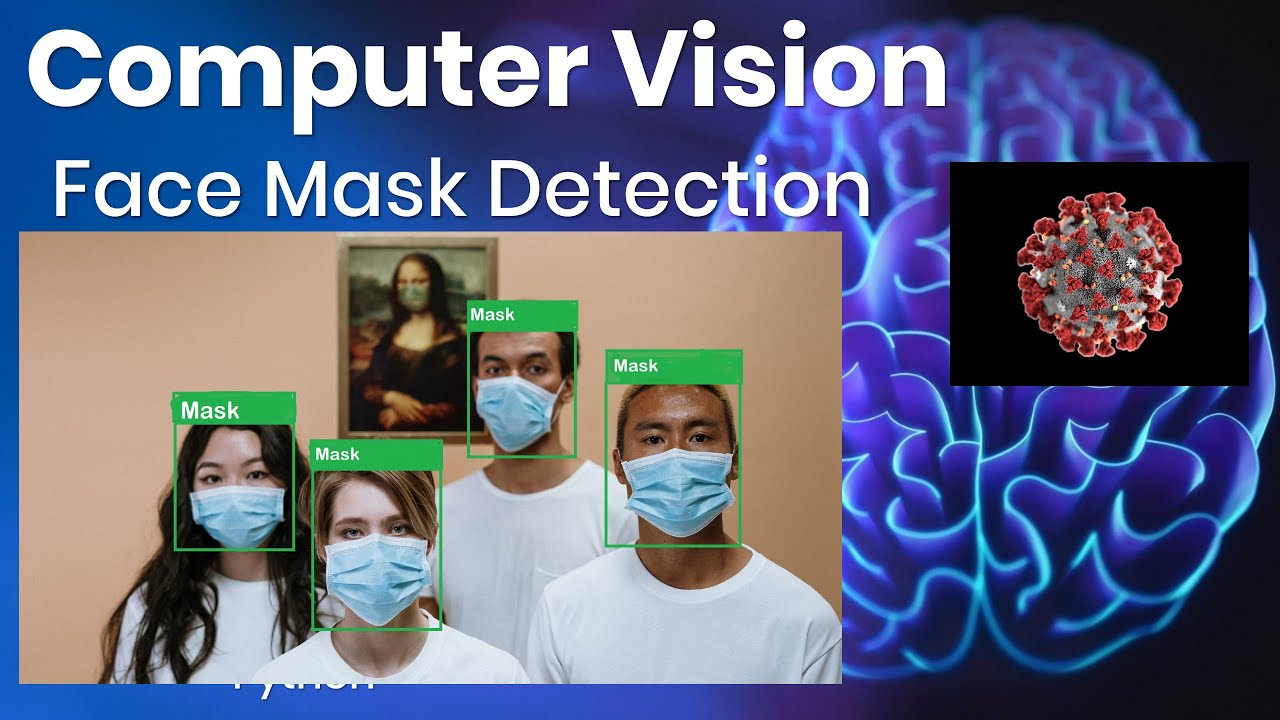

# Abstarct Of Project:

### Considering the covid-19 outbreak, this is best project. Today everyone is aware of taking precaution and safety measures regarding covid-19, so face mask detection will play a huge role to avoid corona virus.


### This project helps us to spread the awareness among people using face mask properly. It detects the face mask on your face whether the person is hiding his/her face by mask or not.

## Steps Followed

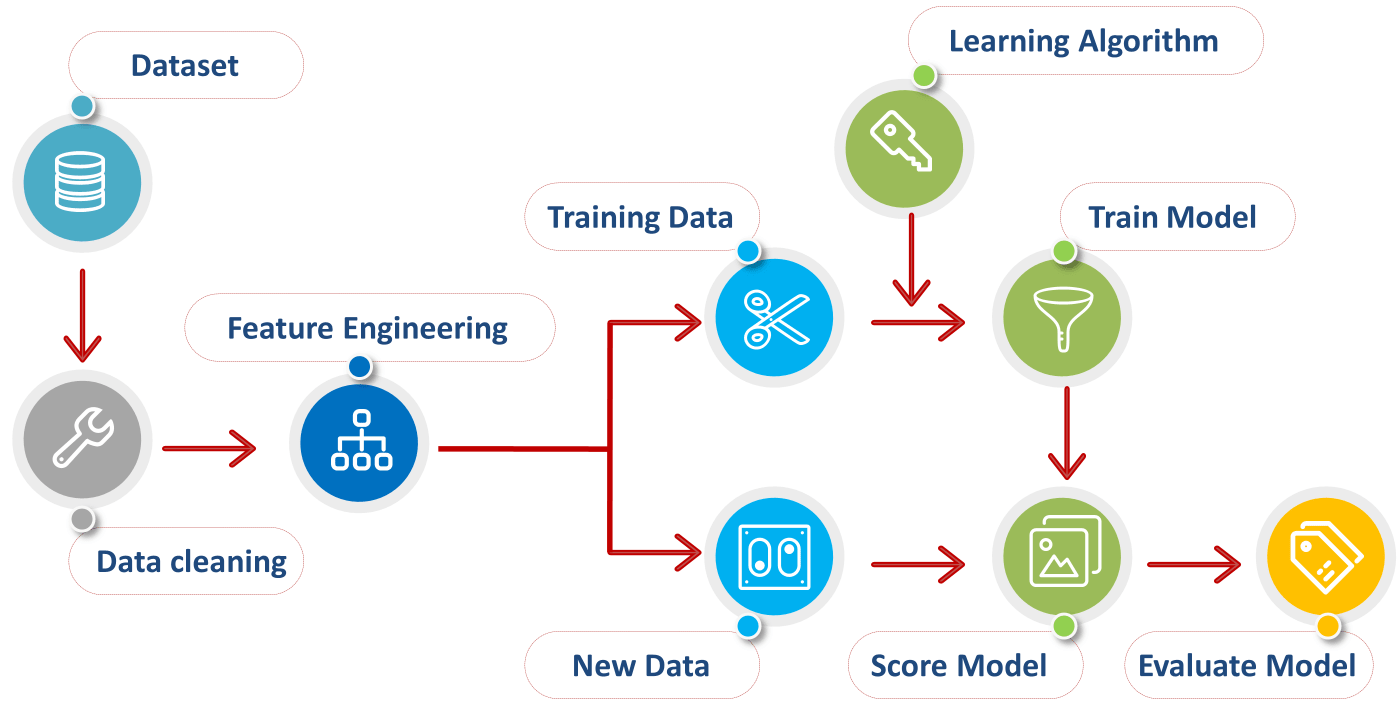

# **Importing Libraries**

Tensor flow : TensorFlow is an open source library for numerical computation and large-scale machine learning. 

Numpy : Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

OpenCV : OpenCV provides a real-time optimized Computer Vision library, tools, and hardware.

Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python



In [60]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# **Loading Image dataset**

Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.

In [61]:
width=224
height=224
#height and width are (224,224) since we will use the mobileNetv2 network
batch_size=32

In [62]:
data=r"C:\Users\thopi\Downloads\Dataset" 

## Read Image 

Let us consider one sample image from the dataset and explore on it 

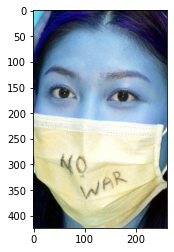

In [63]:
url=r'C:\Users\thopi\Downloads\Dataset\with_mask\with_mask_42.jpg'
image=cv2.imread(url)
plt.imshow(image)

In [38]:
image

array([[[118, 228, 246],
        [117, 227, 245],
        [116, 226, 244],
        ...,
        [ 19,  14,  43],
        [ 18,  10,  41],
        [ 15,   4,  36]],

       [[118, 228, 246],
        [117, 227, 245],
        [116, 226, 244],
        ...,
        [ 19,  13,  48],
        [ 22,  14,  51],
        [ 22,  11,  49]],

       [[115, 227, 245],
        [115, 227, 245],
        [114, 226, 244],
        ...,
        [ 19,  12,  55],
        [ 24,  14,  60],
        [ 23,  12,  58]],

       ...,

       [[  1,  10,  20],
        [  0,   8,  17],
        [  2,  11,  21],
        ...,
        [ 19,  19,  35],
        [ 15,  18,  33],
        [ 14,  17,  32]],

       [[  3,  12,  22],
        [  0,   9,  18],
        [  3,  12,  22],
        ...,
        [ 17,  20,  34],
        [ 16,  19,  34],
        [ 14,  17,  32]],

       [[  3,  12,  22],
        [  0,   7,  16],
        [  0,   8,  18],
        ...,
        [ 18,  21,  35],
        [ 19,  22,  37],
        [ 18,  21,  36]]

In [30]:
print(image.dtype)

uint8


Shape Of An Image

In [33]:
print(image.shape)

(424, 261, 3)


Height Of Image

In [34]:
print(image.shape[0])

424


Width Of Image

In [35]:
print(image.shape[1])

261


 Number Of Channels Of Image

In [36]:
print(image.shape[2])

3


## Creating Histogram

Displaying the histogram of all the pixels in the color image

To create a histogram of our image data, we use the matplot.pylab `hist()` function


<function matplotlib.pyplot.show(*args, **kw)>

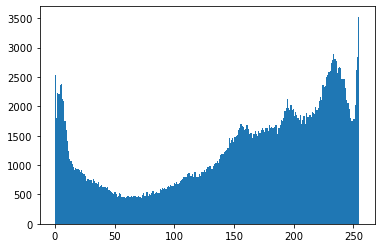

In [37]:
plt.hist(image.ravel(),bins=256,range=[0,255])
plt.show

Displaying the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

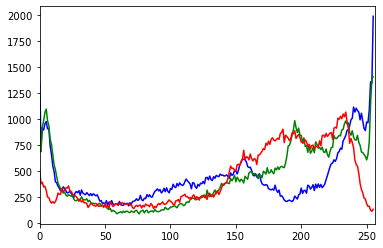

In [39]:
color =('b','g','r')
for i,col in enumerate(color):
  histr=cv2.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histr,color=col)
  plt.xlim([0,256])
plt.show()

## Gray Image

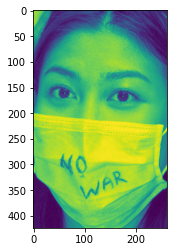

In [7]:
image_color=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image_color)

In [8]:
print(image_color.dtype)

uint8


Shape Of An Gray Image

In [10]:
print(image_color.shape)

(424, 261)


Displaying the histogram of all the pixels in the gray image

Plot the histogram of the gray image. We could observe that the frequency of the image hist has decreased ~ 1/3 of the histogram of color image

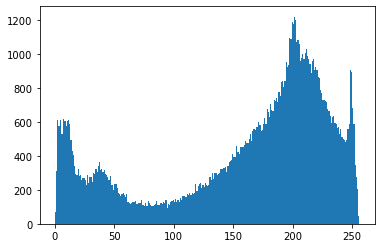

In [42]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

Image contour of the grayscale image

## Image Contour Of Gray Image

Image contouring is process of identifying structural outlines of objects in an image which in turn can help us identify shape of the object.

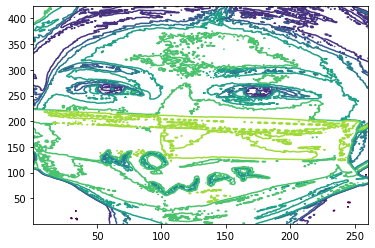

In [43]:
plt.contour(gray_image, origin = "image")

## To write an image

Here the image of grayscale is saved into new filename as Pic.jpg

In [12]:
filename='Pic.jpg'
cv2.imwrite(filename,image_color)

True

# Preprocessing Images

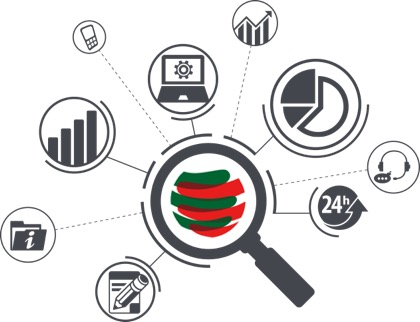

In [33]:
data=r"C:\Users\thopi\Downloads\Dataset" 
categories=os.listdir(data)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


### Splitting the dataset into training and validation 

tf.keras.preprocessing.image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(256,
    256), shuffle=True, seed=None, validation_split=None, subset=None,
    interpolation='bilinear', follow_links=False, smart_resize=False
)

The entire dataset is splitted and 70% is for training and 30% of data is for splitting

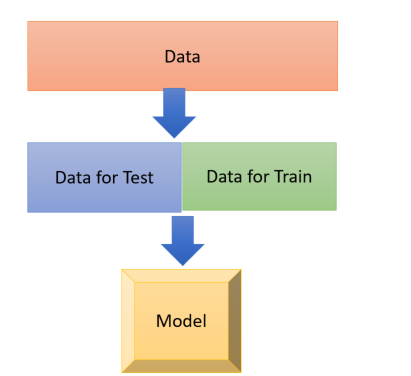

In [64]:
training =tf.keras.preprocessing.image_dataset_from_directory(
    data,
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.


In [65]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
)

Found 7553 files belonging to 2 classes.
Using 2265 files for validation.


In [7]:
classes = training.class_names
classes

['with_mask', 'without_mask']

In [8]:
training

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [9]:
validation

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

## Visualizing images 

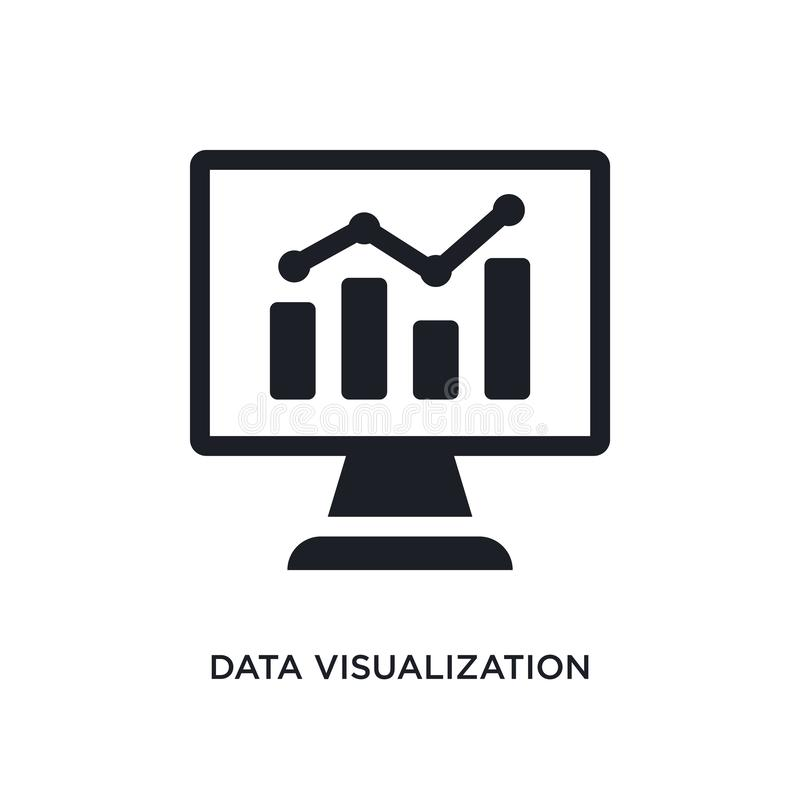

After loading the dataset the best way to verify the progress is by loading the dataset into an image using matplotlib.And using the corresponding labels with the images

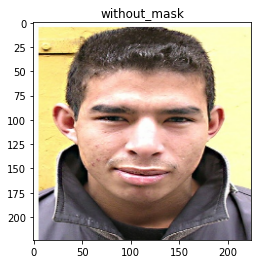

In [48]:
for images, labels in training.take(5):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

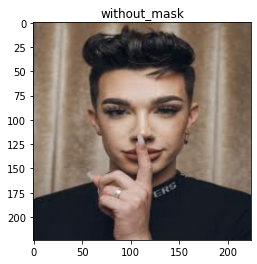

In [49]:
for images, labels in training.take(15):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

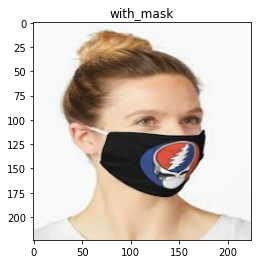

In [50]:
for images, labels in validation.take(1):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

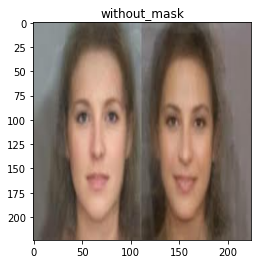

In [51]:
for images, labels in validation.take(7):
    plt.imshow(images[1].numpy().astype('uint8'))
    plt.title(classes[labels[1]])

# Importing the MobileNetv2 model

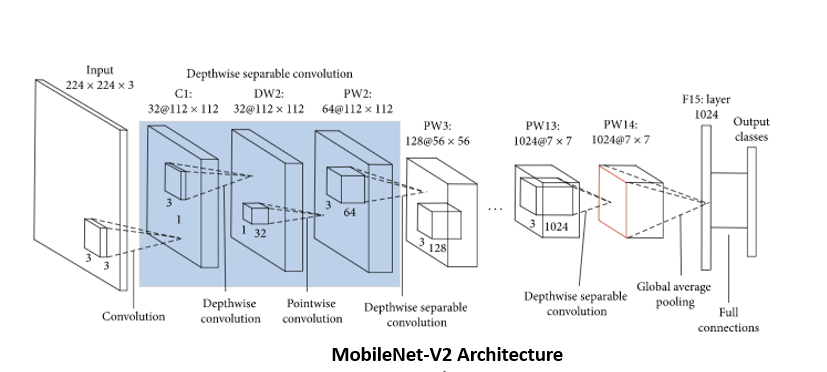

MobileNet-v2 is a convolutional neural network that is 53 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. 

The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. 

The network has an image input size of 224-by-224.

In [66]:
from tensorflow.keras.applications import MobileNetV2

tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    **kwargs
)

MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications
    
    
This function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet.

In [67]:
model = MobileNetV2(weights='imagenet')

## Compiling the model


The compile() method: Specifying a loss, metrics, and an optimizer


To train a model with fit(), you need to specify a loss function, an optimizer, and optionally, some metrics to monitor.You pass these to the model as arguments to the compile() method:


model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


The metrics argument should be a list which means your model can have any number of metrics.

After modeling the mobilenetv2 architecture,the compilation process starts where the we are using teh adam optimizer and Sparcategory as loss,whereas metrics is accuracy 

In [68]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

Model summary
Call model.summary() to print a useful summary of the model, which includes:

Name and type of all layers in the model.

Output shape for each layer.

Number of weight parameters of each layer.

If the model has general topology, the inputs each layer receives

The total number of trainable and non-trainable parameters of the model.

In [69]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

# Training the model

Now we train our model

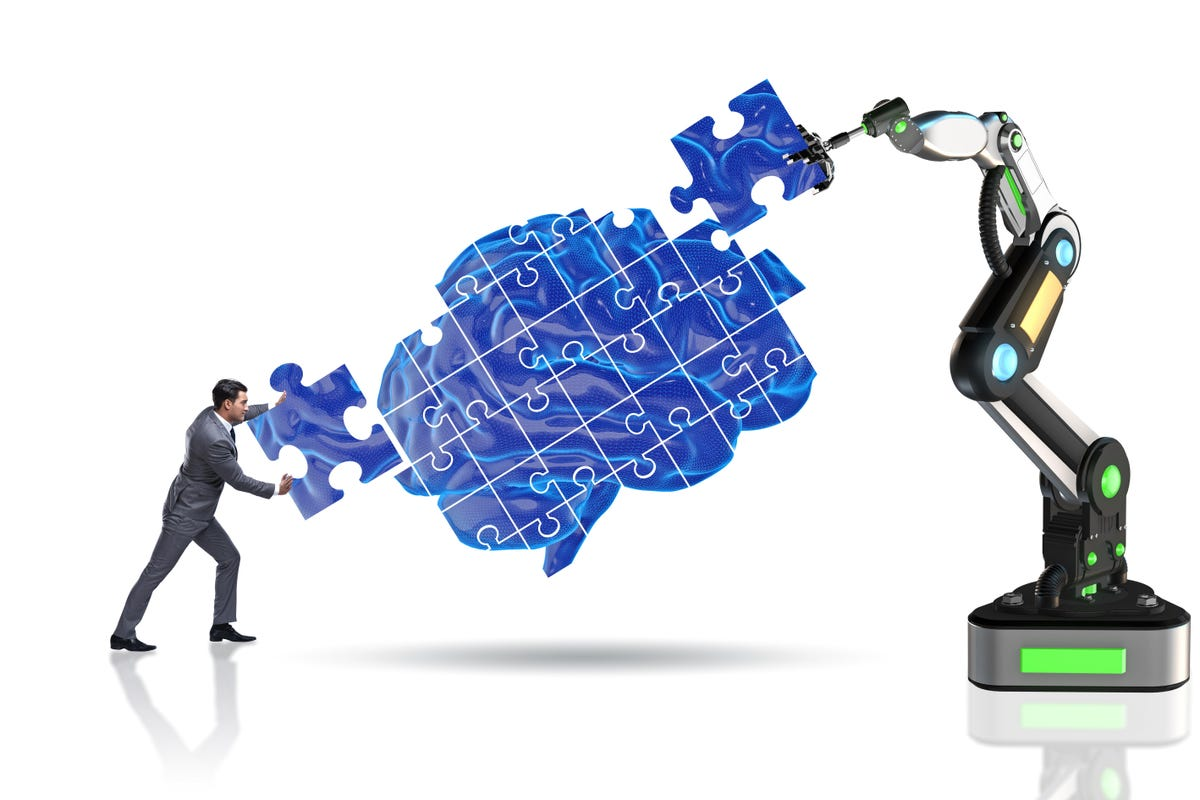

model.fit(
    x=training_data_generator,
    validation_data=validation_data_generator,
    epochs=n_epochs,
    use_multiprocessing=False,
    max_queue_size=100,
    workers=50
)

In [70]:
face_mask_detection = model.fit(training,validation_data=validation,epochs=3)

Epoch 1/3
166/166 [==============================] - 706s 4s/step - loss: 0.1771 - accuracy: 0.9633 - val_loss: 9.2727 - val_accuracy: 0.5488
Epoch 2/3
166/166 [==============================] - 684s 4s/step - loss: 0.0281 - accuracy: 0.9922 - val_loss: 3.8315 - val_accuracy: 0.6883
Epoch 3/3
166/166 [==============================] - 703s 4s/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 1.9107 - val_accuracy: 0.8146


# Save The Model

After we have created a classifier, we can save it for later use. 

In [18]:
model.save('Dummy.model', save_format="h5")

# Prediction On New Image

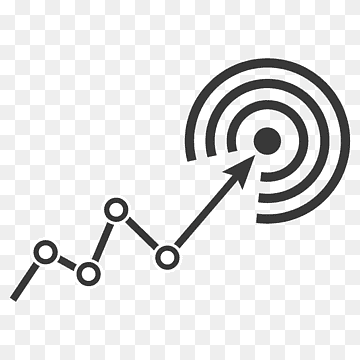

Load the image

In [40]:

img = tf.keras.preprocessing.image.load_img(r'C:\Users\thopi\Downloads\image.jfif', target_size=(height, width))

Convert to array

In [41]:
image_array = tf.keras.preprocessing.image.img_to_array(img)

Expand dimensions to fit in the model

In [42]:
image_array = tf.expand_dims(image_array,0)

Shape of the image

In [43]:
image_array.shape

TensorShape([1, 224, 224, 3])

In [44]:
predictions = model.predict(image_array)

Using softmax to get the results

In [52]:
score = tf.nn.softmax(predictions[0])


In [51]:
print(score)

tf.Tensor(
[0.00271362 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829 0.00099829
 0.00099829 0.00099829 0.00099829 0.00099829 0.0009

In [49]:
import numpy
print(classes[numpy.argmax(score)], 100*numpy.max(score))

with_mask 0.27136208955198526


# Evaluation

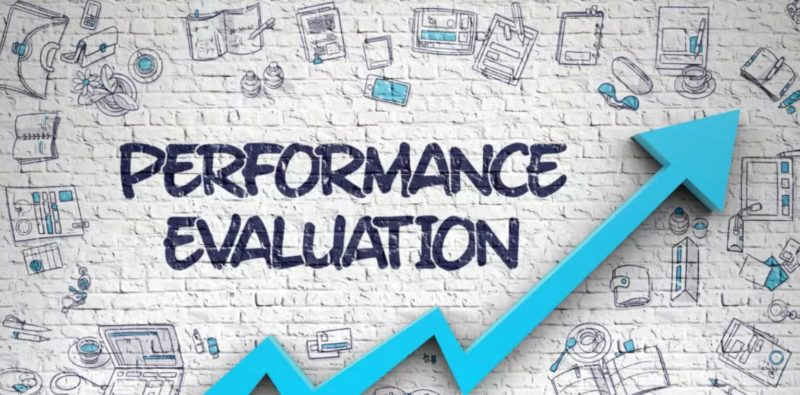

It is necessary to evaluate the model before we move to the next stage. The evaluation will give us insights about two things:

Accuracy

If there is any anomaly in the model - Underfitting or Overfitting.

In any case, we must follow a different approach to train the model to get the best results. This can include, image augmentation and choosing our own layers and placing them over the MobileNetv2 network.


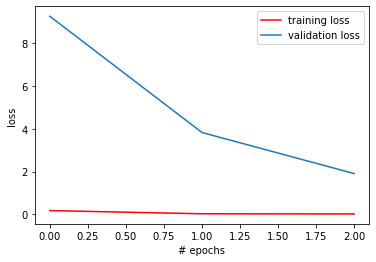

In [72]:
from matplotlib import pyplot as plt

plt.plot(face_mask_detection.history['loss'],'r',label='training loss')
plt.plot(face_mask_detection.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

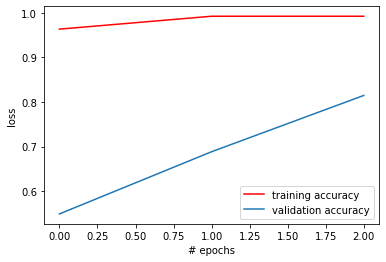

In [74]:
plt.plot(face_mask_detection.history['accuracy'],'r',label='training accuracy')
plt.plot(face_mask_detection.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# How to Improve the Model?

Sometimes, the accuracy of the model isn't what we have anticipated. So, there are a certain practices that can be followed to improve the performance of the model in order to get efficiency while working with the new data.

The following are some of the practices that may improve the model's performance:

Add more training data 

Data Augmentation can help increase the number of training samples. There might be a chance of overfitting the model with increased number of samples, in that case you can try a different model or include a head over the base model with custom layers.